# Importing libraries and dataset

In [ ]:
!pip install -q scikit-learn-extra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers - Mall_Customers.csv")
display(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Preprocessing

In [3]:
total_missing = df.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing)

cols = df.columns
print(cols)
for x in cols:
  print(df[x].isnull().sum())

Total number of missing values in the dataset: 3
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
0
1
1
1
0


In [4]:
df1 = df
df1 = df1.drop(['CustomerID'], axis=1)
df1 = df1.drop(['Gender'], axis=1)

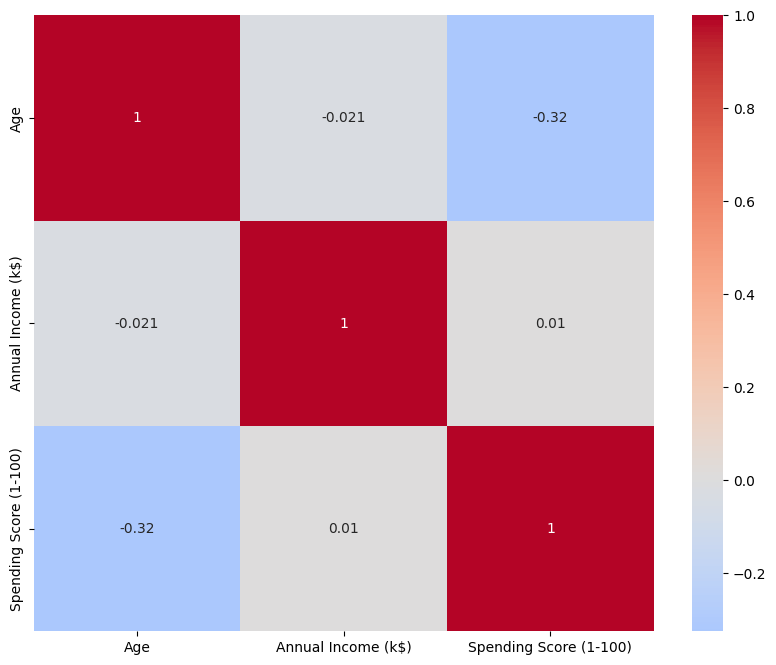

In [5]:
correlation_matrix = df1.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [6]:
# Replace missing values for numerical features
df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)
df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Replace missing values for categorical features
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-6-23d71740b1af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)
<ipython-input-6-23d71740b1af>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

# K-Means

## Using elbow method to find optimal number of clusters

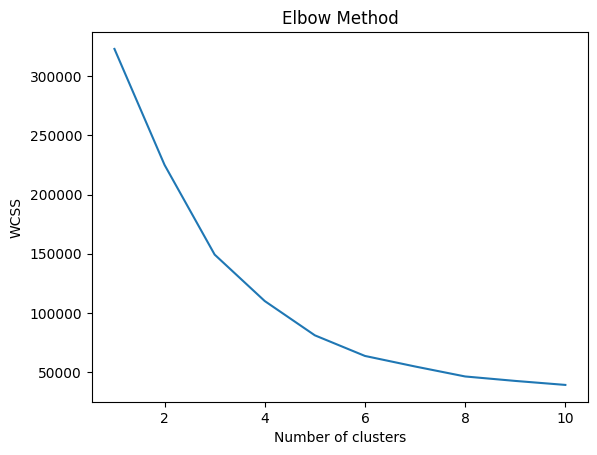

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# We can see that 5 is the optimal number of clusters

## Using built-in kmeans func

In [13]:
# Assuming we have 5 clusters based on the Elbow Method
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster'] = kmeans.labels_

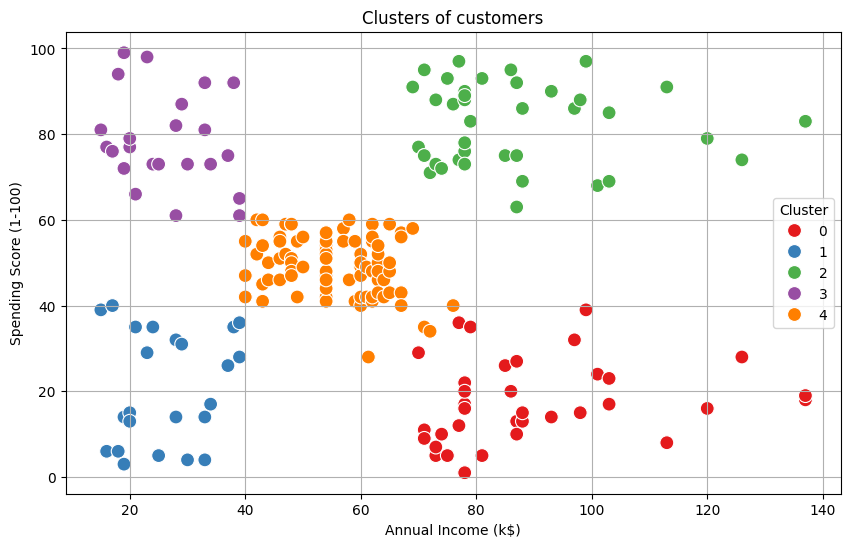

In [14]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)

plt.title('Clusters of customers')
plt.grid(True)
plt.show()

## Writing k means from scratch

In [17]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=300, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        # Set random seed
        np.random.seed(self.random_state)

        # Initialize centroids randomly
        n_samples, n_features = X.shape
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx]

        # Initialize variables
        prev_centroids = None
        self.labels_ = np.zeros(n_samples)

        # Main loop
        for _ in range(self.max_iter):
            # Assign points to nearest centroid
            for i in range(n_samples):
                distances = np.sqrt(np.sum((X[i] - self.centroids)**2, axis=1))
                self.labels_[i] = np.argmin(distances)

            # Store previous centroids
            prev_centroids = self.centroids.copy()

            # Update centroids
            for i in range(self.n_clusters):
                points = X[self.labels_ == i]
                if len(points) > 0:
                    self.centroids[i] = np.mean(points, axis=0)

            # Check convergence
            if np.all(prev_centroids == self.centroids):
                break

        return self

    def predict(self, X):
        # Predict cluster labels for new data
        n_samples = X.shape[0]
        labels = np.zeros(n_samples)

        for i in range(n_samples):
            distances = np.sqrt(np.sum((X[i] - self.centroids)**2, axis=1))
            labels[i] = np.argmin(distances)

        return labels


# Create feature matrix
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=0)
kmeans.fit(X)

# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

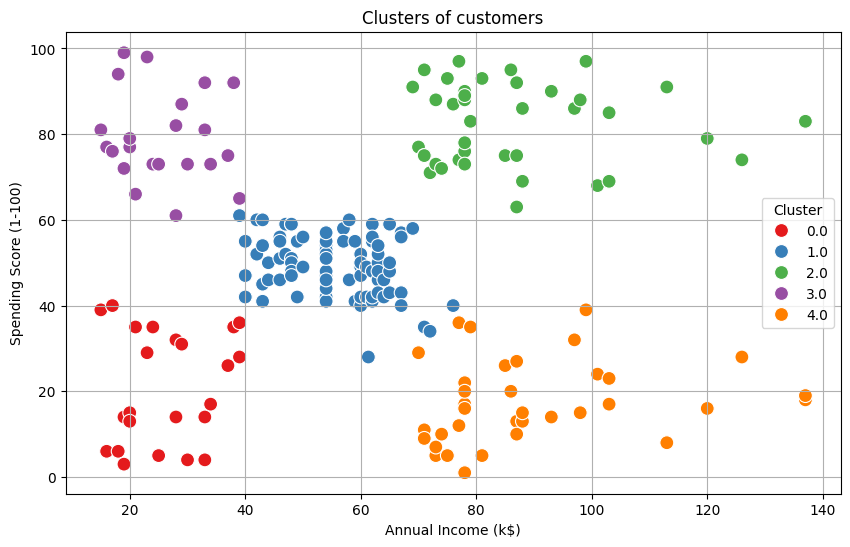

In [18]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)

plt.title('Clusters of customers')
plt.grid(True)
plt.show()

# K-Medoids using sklearn

In [22]:
from sklearn_extra.cluster import KMedoids
import pandas as pd

# Assuming 'df' is your dataframe
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Initialize and fit the KMedoids model
kmedoids = KMedoids(n_clusters=5, metric='euclidean', init='k-medoids++', max_iter=300, random_state=0)
df['Cluster'] = kmedoids.fit_predict(data)

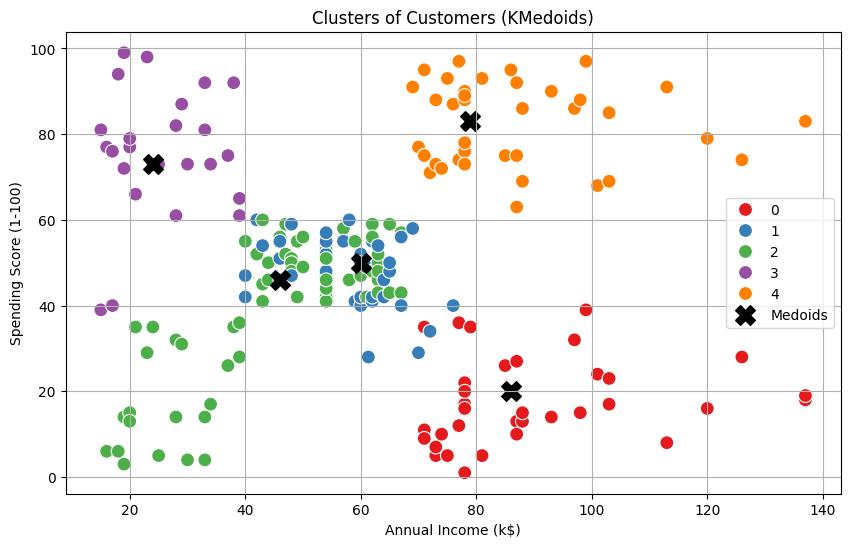

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)

medoid_indices = kmedoids.medoid_indices_
medoids = df.iloc[medoid_indices]
plt.scatter(medoids['Annual Income (k$)'], medoids['Spending Score (1-100)'], c='black', marker='X', s=200, label='Medoids')

plt.title('Clusters of Customers (KMedoids)')
plt.legend()
plt.grid(True)
plt.show()